# Scraping 

In [101]:
import nltk
from bs4 import BeautifulSoup
import bs4 as bs
import urllib.request
global title
global confidence
title = []
confidence = []

In [102]:
url1 = "http://www.natgeotraveller.in/six-years-and-counting/"
a = urllib.request.urlopen(url1).read()
b = bs.BeautifulSoup(a,'lxml')
title1 = b.title.next
print(title1)
body = b.body
body1 = "" 
for p in body.find_all('p'):
    body1+=p.text  
title.append(title1)
confidence.append(0.0)

Six Years And Counting… | Nat Geo Traveller India


In [103]:
url2 = "http://www.natgeotraveller.in/train-to-nowhere/"
a = urllib.request.urlopen(url2).read()
b = bs.BeautifulSoup(a,'lxml')
title2 = b.title.next
print(title2)
body = b.body
body2 = "" 
for p in body.find_all('p'):
    body2+=p.text  
title.append(title2)
confidence.append(0.0)

Train to Nowhere | Nat Geo Traveller India


In [104]:
url3 = "http://www.natgeotraveller.in/what-dreams-may-come/"
a = urllib.request.urlopen(url3).read()
b = bs.BeautifulSoup(a,'lxml')
title3 = b.title.next
print(title3)
body = b.body
body3 = "" 
for p in body.find_all('p'):
    body3+=p.text  
title.append(title3)
confidence.append(0.0)

What Dreams May Come | Nat Geo Traveller India


In [105]:
url4 = "http://www.natgeotraveller.in/getting-saucy-about-food/"
a = urllib.request.urlopen(url4).read()
b = bs.BeautifulSoup(a,'lxml')
title4 = b.title.next
print(title4)
body = b.body
body4 = "" 
for p in body.find_all('p'):
    body4+=p.text  
title.append(title4)
confidence.append(0.0)

Getting Saucy About Food | Nat Geo Traveller India


# Tokenization 

In [106]:
from nltk.tokenize import regexp_tokenize 

In [107]:
tokens1 = regexp_tokenize((title1+body1), "[\w']+")
print(len(tokens1))
# print(tokens1)

538


In [108]:
tokens2 = regexp_tokenize((title2+body2), "[\w']+")
print(len(tokens2))
# print(tokens2)

518


In [109]:
tokens3 = regexp_tokenize((title3+body3), "[\w']+")
print(len(tokens3))
# print(tokens3)

487


In [110]:
tokens4 = regexp_tokenize((title4+body4), "[\w']+")
print(len(tokens4))
# print(tokens4)

553


# Remove Stopwords 

In [111]:
from nltk.corpus import stopwords

In [112]:
stop_words=set(stopwords.words("english"))
filtered_words1=[]
for w in tokens1:
    if w not in stop_words:
        filtered_words1.append(w)
#print(filtered_words1)

In [113]:
stop_words=set(stopwords.words("english"))
filtered_words2=[]
for w in tokens2:
    if w not in stop_words:
        filtered_words2.append(w)
#print(filtered_words2)

In [114]:
stop_words=set(stopwords.words("english"))
filtered_words3=[]
for w in tokens3:
    if w not in stop_words:
        filtered_words3.append(w)
#print(filtered_words3)

In [115]:
stop_words=set(stopwords.words("english"))
filtered_words4=[]
for w in tokens4:
    if w not in stop_words:
        filtered_words4.append(w)
#print(filtered_words4)

In [131]:
fw = [filtered_words1, filtered_words2, filtered_words3, filtered_words4]
tk = [tokens1, tokens2, tokens3, tokens4]
bd = [body1, body2, body3, body4]
tl = [title1, title2, title3, title4]

# Parameter - 1 

### In articles, thoughts have to be conveyed with a specific number of words - neither too low for incomplete information delivery nor too high for the user to lose interest

In [117]:
global confidence
for i in range(0,4):
    if len(fw[i])>=300 and len(fw[i])<350: confidence[i] += 0.2; # 20% confidence
    elif len(fw[i]) in range(200,300) or len(fw[i]) in range(350,450):
        confidence[i] += 0.1;
    print("Total Number of words: ", len(fw[i]))
    print("Confidence: ", round(confidence[i],2))

Total Number of words:  311
Confidence:  0.2
Total Number of words:  313
Confidence:  0.2
Total Number of words:  295
Confidence:  0.1
Total Number of words:  340
Confidence:  0.2


# Parameter - 2 

### Repeating certain words are considered to be bad from an editorial point of view as it signifies the poor vocabulary of the writer

In [118]:
global confidence
for x in range(0,4):
    repeated = [] 
    for i in range(0, len(fw[x])): 
        k = i + 1
        for j in range(k,len(fw[x])): 
            if fw[x][i] == fw[x][j] and fw[x][i] not in repeated: 
                repeated.append(fw[x][i]) 
    print("Number of repeated words: ",len(repeated))
    if len(repeated)<20: confidence[x]+=0.3
    elif len(repeated)<30: confidence[x]+=0.2
    elif len(repeated)<40: confidence[x]+=0.1
    print("Confidence: ",round(confidence[x],2))

Number of repeated words:  23
Confidence:  0.4
Number of repeated words:  23
Confidence:  0.4
Number of repeated words:  15
Confidence:  0.4
Number of repeated words:  25
Confidence:  0.4


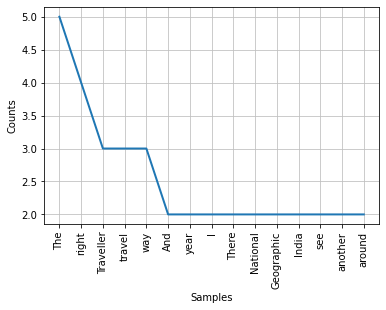

In [119]:
fd = nltk.FreqDist(fw[0])
fd.plot(15, cumulative=False)

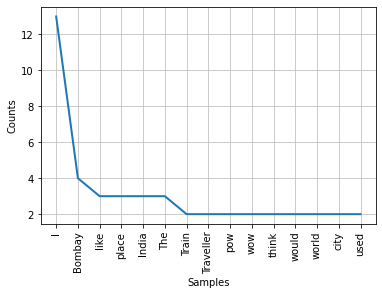

In [120]:
fd = nltk.FreqDist(fw[1])
fd.plot(15, cumulative=False)

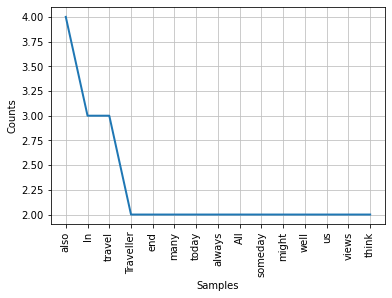

In [121]:
fd = nltk.FreqDist(fw[2])
fd.plot(15, cumulative=False)

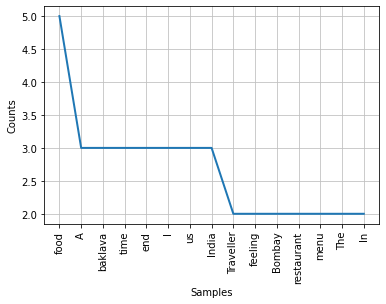

In [122]:
fd = nltk.FreqDist(fw[3])
fd.plot(15, cumulative=False)

# Parameter 3

### Cosine Similarity. For this, we need to consider multiple documents by the same author. Hence this parameter is not applicable for the confidence scores


In [123]:
global confidence
cosine = 0
l1, l2, l3, l4 = [],[],[],[]
total = {w for w in filtered_words1}
total = total.union({w for w in filtered_words2})
total = total.union({w for w in filtered_words3})
total = total.union({w for w in filtered_words4})

for w in total: 
    if w in filtered_words1: 
        l1.append(1) 
    else: 
        l1.append(0) 
    if w in filtered_words2: 
        l2.append(1) 
    else: 
        l2.append(0) 
    if w in filtered_words3: 
        l3.append(1) 
    else: 
        l3.append(0) 
    if w in filtered_words4: 
        l4.append(1) 
    else: 
        l4.append(0) 
c = 0
for i in range(len(total)): 
        c+= l1[i]*l2[i] 
cosine = cosine + (c / float((sum(l1)*sum(l2))**0.5))
c = 0
for i in range(len(total)): 
        c+= l1[i]*l3[i] 
cosine = cosine + (c / float((sum(l1)*sum(l3))**0.5))
c = 0
for i in range(len(total)): 
        c+= l1[i]*l4[i] 
cosine = cosine + (c / float((sum(l1)*sum(l4))**0.5))
c = 0
for i in range(len(total)): 
        c+= l2[i]*l3[i] 
cosine = cosine + (c / float((sum(l2)*sum(l3))**0.5))
c = 0
for i in range(len(total)): 
        c+= l2[i]*l4[i] 
cosine = cosine + (c / float((sum(l2)*sum(l4))**0.5))
c = 0
for i in range(len(total)): 
        c+= l3[i]*l4[i] 
cosine = cosine + (c / float((sum(l3)*sum(l4))**0.5))
print("similarity: ", cosine/6) 
if(cosine/6 < 0.25):
    print("Eligible Candidate")

similarity:  0.20196232633194666
Eligible Candidate


# Parameter 4 

### An article can be considered bloated if the number of adjectives are high

In [124]:
from nltk.corpus import wordnet as wn
global confidence
for x in range(0,4):
    adj = [] 
    for i in range(0, len(fw[x])): 
        tmp = wn.synsets(fw[x][i])
        for temp in tmp:
            c = temp.name().split('.')
            #print(c)
            if c[1] == 'a' and fw[x][i] not in adj: 
                adj.append(fw[x][i]) 
    print("Number of Adjectives: ",len(adj))
    diff = len(fw[x])-len(adj)
    print("Difference: ",diff)
    if diff<35: confidence[x]+=0.1
    elif diff<40: confidence[x]+=0.2
    elif diff<45: confidence[x]+=0.3
    print("Confidence: ",round(confidence[x],2))
    print()

Number of Adjectives:  36
Difference:  275
Confidence:  0.4

Number of Adjectives:  43
Difference:  270
Confidence:  0.4

Number of Adjectives:  39
Difference:  256
Confidence:  0.4

Number of Adjectives:  40
Difference:  300
Confidence:  0.4



# Parameter 5

### Number of polysyllables should be within a range where it shouldn't sound complex nor too simple. Here, 4 syllables are set as the parameter

In [125]:
# https://stackoverflow.com/questions/405161/detecting-syllables-in-a-word

a4 = [0,0,0,0]
global confidence
for x in range(0,4):
    for i in range(0, len(fw[x])): 
        theText = fw[x][i]
        cleanText = ""
        for ch in theText:
            if ch in "abcdefghijklmnopqrstuvwxyz'’":
                cleanText += ch
            else:
                cleanText += " "

        asVow    = "aeiouy'’"
        dExep    = ("ei","ie","ua","ia","eo")
        theWords = cleanText.lower().split()
        allSylls = 0
        for inWord in theWords:
            nChar  = len(inWord)
            nSyll  = 0
            wasVow = False
            wasY   = False
            if nChar == 0:
                continue
            if inWord[0] in asVow:
                nSyll += 1
                wasVow = True
                wasY   = inWord[0] == "y"
            for c in range(1,nChar):
                isVow  = False
                if inWord[c] in asVow:
                    nSyll += 1
                    isVow = True
                if isVow and wasVow:
                    nSyll -= 1
                if isVow and wasY:
                    nSyll -= 1
                if inWord[c:c+2] in dExep:
                    nSyll += 1
                wasVow = isVow
                wasY   = inWord[c] == "y"
            if inWord.endswith(("e")):
                nSyll -= 1
            if inWord.endswith(("le","ea","io")):
                nSyll += 1
            if nSyll < 1:
                nSyll = 1
            # print("%-15s: %d" % (inWord,nSyll))
            if(nSyll>3): a4[x]+=1

In [126]:
global confidence
for x1 in range(0,4):
    print("Number of Polysyllablic words: ", a4[x1])
    if a4[x1] in range(25,35): confidence[x1]+=0.3
    elif a4[x1] in range(15,25): confidence[x1]+=0.2
    elif a4[x1] in range(35,45): confidence[x1]+=0.2
    print("Confidence: ",round(confidence[x1],2))

Number of Polysyllablic words:  26
Confidence:  0.7
Number of Polysyllablic words:  18
Confidence:  0.6
Number of Polysyllablic words:  32
Confidence:  0.7
Number of Polysyllablic words:  27
Confidence:  0.7


# Parameter 6

### Sentiment Analysis, to ensure that the article sends a positive feeling to the reader

In [127]:
def get_sentiment(sentence):
    analysis = TextBlob(sentence)
    if analysis.sentiment.polarity > 0:
        return 'P'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'N'

In [134]:
global confidence
for x in range(0,4):
    a = re.split('[?.]', bd[x])
    b = []
    count = 0
    for i in range(len(a)):
        z = get_sentiment(a[i])
        b.append(z)
        if z=='P':
            count+=1
    if count/len(a)>0.4: confidence[x]+=0.2
    elif count/len(a)>0.3: confidence[x]+=0.1
    print("Positivity: ", round(count/len(a), 2))
    print("Confidence: ", round(confidence[x],2))

Positivity:  0.44
Confidence:  1.1
Positivity:  0.33
Confidence:  0.8
Positivity:  0.38
Confidence:  0.9
Positivity:  0.41
Confidence:  1.1


# Run this for resetting the confidence scores

In [100]:
global confidence
for i in range(len(confidence)):
    confidence[i]=0
print(confidence)

[0, 0, 0, 0]


# Calculating confidences 

### All the scores which are cumulated till now are checked against a minimum threshold score

In [135]:
global confidence
for i in range(0,4):
    if confidence[i]>0.9:
        print("Author of article", i+1, "is hired")
        print("Article ",i+1,":",tl[i])

Author of article 1 is hired
Article  1 : Six Years And Counting… | Nat Geo Traveller India
Author of article 4 is hired
Article  4 : Getting Saucy About Food | Nat Geo Traveller India
